In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotifyclassification/data.csv


# Recomendation System Types
### Link : https://www.kaggle.com/geomack/spotifyclassification
<img src='https://miro.medium.com/max/1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png'>
pic credits: miro.medium.com

In [2]:
data_frame = pd.read_csv("/kaggle/input/spotifyclassification/data.csv")
data_frame = data_frame.drop('Unnamed: 0', axis=1)
data_frame.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# 1. Data Exploration

In [3]:
# To see the data structure of the data_frame and the shape
print('Shape:', data_frame.shape, end='\n\n')
data_frame.info()

Shape: (2017, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4

- There seems to be no missing values in the dataset as the shape and the non-null column match. 
- Just to be sure we will still have a look at all the missing values.

In [4]:
# To ckeck the total NA values present in the columns
data_frame.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
# to count the number of unique values per column 
data_frame.nunique()

acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
song_title          1956
artist              1343
dtype: int64

In [6]:
# checking for class imbalance
data_frame['target'].value_counts()

1    1020
0     997
Name: target, dtype: int64

In [7]:
#checking for duplicate records
data_frame.duplicated().value_counts()

False    2012
True        5
dtype: int64

In [8]:
# removing the duplicate rows from the data.
data_frame=data_frame.drop_duplicates()
data_frame.duplicated().value_counts()

False    2012
dtype: int64

# 2. Data Visualisation

<AxesSubplot:>

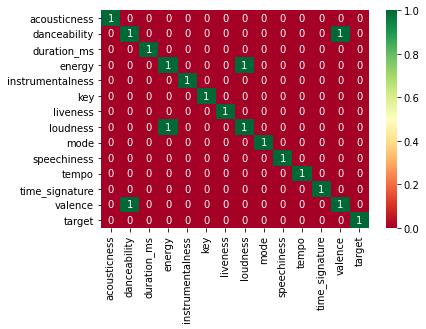

In [9]:
# checking for multicollinearity 
sns.heatmap(data_frame.corr()>0.4, cmap ='RdYlGn', annot = True)

### Insights:
- loudness and energy seem to be highly correlated.
- valence and danceability seem to have a high correlation as well.

<AxesSubplot:>

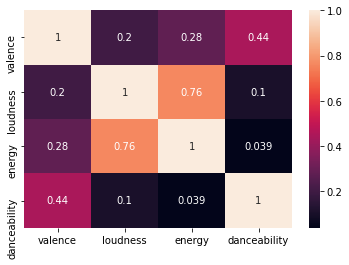

In [10]:
df_heatmap = data_frame[['valence','loudness','energy','danceability']].corr()
sns.heatmap(df_heatmap, annot = True)

### Insights:
- loudness and energy : 0.76 (very high)
- valence and danceability : 0.44 (high)

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

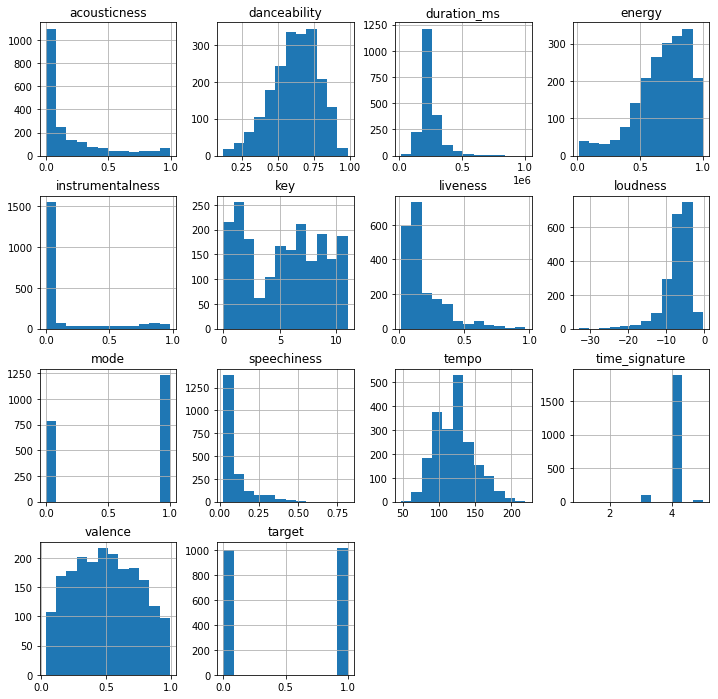

In [11]:
# to check the distributions of the other columns
data_frame.hist(figsize=(12,12), bins=12)

# 3. Data Transformation

In [12]:
data_frame.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = data_frame.drop('song_title',axis=1)
y = data_frame['song_title']

le = LabelEncoder()
X['artist'] = le.fit_transform(X['artist'])
mms = MinMaxScaler()
X = mms.fit_transform(X)
pca = PCA(n_components=8)
X = pca.fit_transform(X)

# how does the array look like after transformation
X[23,:].reshape(-1,1)

array([[ 0.79020366],
       [ 0.29693188],
       [-0.17178421],
       [ 0.3539228 ],
       [-0.3925759 ],
       [ 0.28572037],
       [-0.40583335],
       [ 0.19301415]])

# 4. Model Selection

pic credit : dataaspirant.com
<img src='https://i0.wp.com/dataaspirant.com/wp-content/uploads/2015/04/cosine.png'>
<br><br>

- cosine(90) = 0
- cosine(0) = 1
- cosine (45) = 0.7


In [14]:
from numpy import dot
from numpy.linalg import norm

def cosine_sim(query, index):
    cosine =[]
    query = np.array(X[query,:])
    for i in range(len(index[0])):
        temp = np.array(X[index[0][i],:])
        score = dot(query, temp)/(norm(query)*norm(temp))
        cosine.append(score)
    return cosine

In [15]:
from sklearn.neighbors import NearestNeighbors

NN = NearestNeighbors(metric='cosine', algorithm='brute')
NN.fit(X)

query = np.random.choice(X.shape[0])

# need to reshape the data to follow a find he nearest neighbours
distances, index = NN.kneighbors(X = X[query,:].reshape(1, -1),n_neighbors=6)
cosine = cosine_sim(query, index)
# cosine

In [16]:
# Print the recomendations and their distances
for i in range(len(index.flatten())):
    if(i==0):
        print('Recommendation  for {0}:'.format(data_frame.iloc[query]['song_title']), end='\n\n')
    else:
        print('{}: {}, with distance of {:.4f}:'.format(i, data_frame.iloc[index.flatten()[i]]['song_title'], 
                                                       distances.flatten()[i]))

Recommendation  for E.T. - feat. Kanye West:

1: Rockstar, with distance of 0.0220:
2: All About Tonight - featuring Cymphonique Miller, with distance of 0.0247:
3: You Look Good, with distance of 0.0292:
4: Just a Friend 2002 - Radio Edit, with distance of 0.0303:
5: Time of Our Lives, with distance of 0.0304:


In [17]:
# Print the recomendations and their similarity
for i in range(len(index.flatten())):
    if(i==0):
        print('Recommendation  for {0}:'.format(data_frame.iloc[query]['song_title']), end='\n\n')
    else:
        print('{}: {}, with similarity of {:.2f}%'.format(i, data_frame.iloc[index.flatten()[i]]['song_title'], 
                                                       cosine[i]*100))

Recommendation  for E.T. - feat. Kanye West:

1: Rockstar, with similarity of 97.80%
2: All About Tonight - featuring Cymphonique Miller, with similarity of 97.53%
3: You Look Good, with similarity of 97.08%
4: Just a Friend 2002 - Radio Edit, with similarity of 96.97%
5: Time of Our Lives, with similarity of 96.96%


# HomeWork:
### Netflix Dataset Link: https://www.kaggle.com/ritesh2000/trending-tv-shows-on-netflix